# Chapter 3

# Data Exploration

Data exploration is of paramount importance in data science. It is the necessary process prior to creating a model because it gives a highlight of the dataset and definitely makes clear the path to achieving our objectives.

Data exploration familiarizes the data scientist with the data and helps to know what general hypothesis we can infer from the dataset. So, we can say it is a process of extracting some information from the dataset, not knowing beforehand what to look for.

In this chapter, we will study:

- Sampling, population, and weight vectors 
- Inferring column types
- Summary of a dataset
- Scalar statistics
- Measures of variation
- Data exploration using visualizations

Data exploration involves descriptive statistics. Descriptive statistics is a field of data analysis that finds out patterns by meaningfully summarizing data. This may not lead to the exact results or the model that we intend to build, but it definitely helps to understand the data.

Julia can effectively be used for data exploration. Julia provides a package called StatsBase.jl, which contains the necessary functions for statistics. We would presume throughout the chapter that you have added the package:

    using Pkg
    Pkg.add("StatsBase")

In [1]:
#using Pkg
#Pkg.add("StatsBase")

In [2]:
using StatsBase

# 1. Sampling, population, and weight vectors

# Sampling


Suppose there are 10 million people in New Delhi and if we calculate the mean of the heights of 1,000 people taken at random living there, it wouldn't be the average height of the people of New Delhi, but it would definitely give an idea.

While gathering the data of these 10 million people, let's say we started from a particular age or community, or in any sequential manner.

Now, if we take 1,000 people who are consecutive in the dataset, there is a high probability that they would have similarities among them. This similarity would not give us the actual highlight of the dataset that we are trying to achieve. So, taking a small chunk of consecutive data points from the dataset wouldn't give us the insight that we want to gain. To overcome this, we use sampling.


Sampling is a technique to randomly select data from the given dataset such that they are not related to each other, and therefore we can generalize the results that we generate on this selected data over the complete dataset. Sampling is done over a population.


# Population


A population in statistics refers to the set of all the data points that are there in the dataset and which have at least one common property. In the previous example, the people have the common property of being from the same geographic region.

Let's take the example of the iris dataset. Although it has just 150 records, it would give us an idea on how to take a sample from the dataset:


In [3]:
using RDatasets

In [4]:
iris_dataframe = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


We will use the RDatasets package, which contains the iris dataset, and will load it into a DataFrame. So, this DataFrame contains the “population” and we want to take a sample from it:

In [5]:
sample(iris_dataframe[:SepalLength])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1


5.0

In [6]:
sample(iris_dataframe[:SepalLength], 5)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[6]:1
└ @ Core In[6]:1


5-element Array{Float64,1}:
 4.6
 4.8
 6.7
 5.7
 6.3

The sample() function can be used to return a random value from the dataset or an array of randomly chosen values:

    sample(x, num_of_elements[; replace=true, ordered=false])

The replace and ordered arguments are used in specific cases:

- replace: This is used if the replacement is done when a same value is returned
(default=true)
- ordered: This is used when the values returned are in ascending order
(default=false)


Ideally, the sample taken from the given dataset should represent the population. But mostly, it under—or over—represents many groups present in the dataset. 

Weighting adjustment is one of the very common correction techniques. In this technique, an adjustment weight is assigned to each record. The record or group that we think is under-represented gets a weight larger than 1 and the record or group that we think is over- represented gets a weight smaller than 1.


# Weight Vectors

Julia has a type, WeightVec, to represent weight vectors to facilitate the assignment of weights to samples. The need for a specialized data type for weight vectors was:

- To explicitly distinguish the role of this particular vector from other data vectors
- To save computation cycles by storing the sum of the weights and avoiding recomputing the sum of the weights again

Weight vectors can be constructed like this:


# 1. AnalyticWeights

Analytic weights describe a non-random relative importance (usually between 0 and 1) for each observation. These weights may also be referred to as reliability weights, precision weights or inverse variance weights. These are typically used when the observations being weighted are aggregate values (e.g., averages) with differing variances.

In [7]:
w = AnalyticWeights([0.2, 0.1, 0.3])
w = aweights([0.2, 0.1, 0.3])

3-element AnalyticWeights{Float64,Float64,Array{Float64,1}}:
 0.2
 0.1
 0.3

# 2. FrequencyWeights

Frequency weights describe the number of times (or frequency) each observation was observed. These weights may also be referred to as case weights or repeat weights.

In [8]:
w = FrequencyWeights([2, 1, 3])
w = fweights([2, 1, 3])

3-element FrequencyWeights{Int64,Int64,Array{Int64,1}}:
 2
 1
 3

# 3. ProbabilityWeights

Probability weights represent the inverse of the sampling probability for each observation, providing a correction mechanism for under- or over-sampling certain population groups. These weights may also be referred to as sampling weights.

In [9]:
w = ProbabilityWeights([0.2, 0.1, 0.3])
w = pweights([0.2, 0.1, 0.3])

3-element ProbabilityWeights{Float64,Float64,Array{Float64,1}}:
 0.2
 0.1
 0.3

# 4. UnitWeights

Unit weights are a special case in which all observations are given a weight equal to 1. Using such weights is equivalent to computing unweighted statistics.

In [10]:
w = uweights(3)
w = uweights(Float64, 3)

3-element UnitWeights{Float64}:
 1.0
 1.0
 1.0

In [11]:
eltype(w)

Float64

In [12]:
length(w)

3

In [13]:
isempty(w)

false

In [14]:
values(w)

┌ Warning: `values(wv::AbstractWeights)` is deprecated, use `convert(Vector, wv)` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1


3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [15]:
sum(w)

3.0

In [16]:
eltypes(iris_dataframe)

┌ Warning: `eltypes(df::AbstractDataFrame)` is deprecated, use `eltype.(eachcol(df))` instead.
│   caller = top-level scope at In[16]:1
└ @ Core In[16]:1


5-element Array{DataType,1}:
 Float64
 Float64
 Float64
 Float64
 CategoricalValue{String,UInt8}

As the sum is already stored by WeightVec, it is returned instantaneously without any computation.

# 2.  Inferring column types

To understand the dataset and move any further, we need to first understand what type of data we have. As our data is stored in columns, we should know their type before performing any operations. This is also called creating a data dictionary:

In [17]:
typeof(iris_dataframe[1,:SepalLength])

Float64

In [18]:
typeof(iris_dataframe[1,:Species])

CategoricalValue{String,UInt8}

We have used the classic dataset of iris here. We already know the type of the data in these columns. We can apply the same function to any similar dataset. Suppose we were only given columns without labels; then it would have been hard to determine the type of data these columns contain.

# 3. Basic statistical summaries

Let's use a different dataset:

In [19]:
exam= dataset("mlmRev","Exam")

,School,NormExam,SchGend,SchAvg,VR,Intake,StandLRT,Sex,Type
,Cat…,Float64,Cat…,Float64,Cat…,Cat…,Float64,Cat…,Cat…
1,1,0.261324,mixed,0.166175,mid 50%,bottom 25%,0.619059,F,Mxd
2,1,0.134067,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd
3,1,-1.72388,mixed,0.166175,mid 50%,top 25%,-1.36458,M,Mxd
4,1,0.967586,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd
5,1,0.544341,mixed,0.166175,mid 50%,mid 50%,0.371105,F,Mxd
6,1,1.7349,mixed,0.166175,mid 50%,bottom 25%,2.18944,M,Mxd
7,1,1.03961,mixed,0.166175,mid 50%,top 25%,-1.11662,M,Mxd
8,1,-0.129085,mixed,0.166175,mid 50%,mid 50%,-1.03397,M,Mxd
9,1,-0.939378,mixed,0.166175,mid 50%,mid 50%,-0.538061,F,Mxd


These are exam scores from Inner London. To get some information about the dataset, we will use the describe() function, which we have already discussed in previous chapters:

In [20]:
describe(exam)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,School,,1,,65,65,,"CategoricalValue{String,UInt8}"
2,NormExam,-0.000113805,-3.66607,0.0043222,3.66609,,,Float64
3,SchGend,,mixed,,girls,3,,"CategoricalValue{String,UInt8}"
4,SchAvg,0.00181039,-0.755961,-0.020198,0.637656,,,Float64
5,VR,,bottom 25%,,top 25%,3,,"CategoricalValue{String,UInt8}"
6,Intake,,bottom 25%,,top 25%,3,,"CategoricalValue{String,UInt8}"
7,StandLRT,0.00181035,-2.93495,0.0404992,3.01595,,,Float64
8,Sex,,F,,M,2,,"CategoricalValue{String,UInt8}"
9,Type,,Mxd,,Sngl,2,,"CategoricalValue{String,UInt8}"


The columns are described as follows:

-  Length refers to the number of records (rows).
- Type refers to the data type of the column. Therefore, School is of the Pooled ASCIIString data type.
- NA and NA% refer to the number and percentage of the NA values present in the column. This is really helpful as you don't need to manually check for missing records now.
- Unique refers to the number of unique records present in the column.
- Min and Max are the minimum and maximum values present in the column (this does not apply to columns having ASCIIStrings). These are the values at the 0% and 100% of the data points. Min and Max define the range of data.
- 1st quantile and 3rd quantile refer to the value at 25% and 75% of the data points respectively. Similarly, median refers to the value at the 50% of the data points.

# Calculating the mean of the array or dataframe

Julia provides different kinds of mean functions. Each has its own use case:

- geomean(arr): This computes the geometric mean of arr:

In [21]:
a=[123,4234,23423,1231231,1432432423,1341413413]

6-element Array{Int64,1}:
        123
       4234
      23423
    1231231
 1432432423
 1341413413

In [22]:
geomean(a)

553833.3901002567

- harmmean(arr): This computes the harmonic mean of arr:


In [23]:
harmmean(a)

713.4557870657444

- trimmean(arr, fraction): This is used to compute the mean of the trimmed dataset. The second argument is used to provide the fraction over which the dataset will be trimmed.

The mean function is also extended. It can take a weighted vector as an argument to compute the weighted mean:

In [24]:
a

6-element Array{Int64,1}:
        123
       4234
      23423
    1231231
 1432432423
 1341413413

In [25]:
wv=rand(6)

6-element Array{Float64,1}:
 0.7890107745712578
 0.8908984370858231
 0.32238220345791735
 0.6971412780222261
 0.6492743484815635
 0.23895754826418591

In [26]:
mean(a, weights(wv))

3.4882086087950814e8

# 4. Scalar statistics

Various functions are provided by Julia's package to compute various statistics. These functions are used to describe data in different ways as required.

In [27]:
describe(a)

Summary Stats:
Length:         6
Missing Count:  0
Mean:           462517474.500000
Minimum:        123.000000
1st Quartile:   9031.250000
Median:         627327.000000
3rd Quartile:   1006367867.500000
Maximum:        1432432423.000000
Type:           Int64


# Standard deviations and variances

The mean and median we earlier computed (in the describe() function) are measures of central tendency. Mean refers to the center computed after applying weights to all the values and median refers to the center of the list.

Variance is a measurement of the spread between data points in a dataset. It is computed by calculating the distance of numbers from the mean. Variance measures how far each number in the set is from the mean.

In [28]:
a

6-element Array{Int64,1}:
        123
       4234
      23423
    1231231
 1432432423
 1341413413

In [29]:
std(a)

UndefVarError: UndefVarError: std not defined

In [30]:
a= [1 2;3 4;5 6;7 8;9 10]

5×2 Array{Int64,2}:
 1   2
 3   4
 5   6
 7   8
 9  10

In [31]:
mean_and_var(a,2)

([1.5; 3.5; … ; 7.5; 9.5], [0.5; 0.5; … ; 0.5; 0.5])

Standard deviation is the measurement of the spread or dispersion of the values in the dataset. It is square root of the variance. If it is close to 0, that means the dataset has very little dispersion from the mean. And greater values define high dispersion of the values from the mean. Standard deviation is different from variance as it has the same units as the mean:


In [32]:
mean_and_std(a,2)

([1.5; 3.5; … ; 7.5; 9.5], [0.7071067811865476; 0.7071067811865476; … ; 0.7071067811865476; 0.7071067811865476])

Statistical analysis involves characterization of data based on skewness and kurtosis.

Skewness is the measure of the lack of symmetry from the center point of the dataset or the distribution. So, a distribution can be skewed to the left or it can be skewed to the right.


In [33]:
a=[12,234,567, 1234,535,335,19]

7-element Array{Int64,1}:
   12
  234
  567
 1234
  535
  335
   19

In [34]:
skewness(a)

0.9763073577410081

Kurtosis is the measure of the flatness of the distribution or the dataset as compared to a normal distribution. So, a distribution with a high peak at the center (mean) and a sharp decline to both the sides is said to have high kurtosis, and a distribution with a flatter peak at the mean is said to have low kurtosis:
 

In [35]:
kurtosis(a)

0.04885930438714192

A moment in statistics is:
- 0th moment is the total probability 
- 1st moment is the mean
- 2nd central moment is the variance 
- 3rd moment is the skewness
- 4th moment is the kurtosis (with shift and normalization)

In [36]:
moment(a,3)

5.806162264723031e7

Here we are calculating the k-th order central moment. It is defined as:

    (a - mean(a)).^k


# 5.  Measures of variation

It is good to have knowledge of the variation of values in the dataset. Various statistical functions facilitate:

- span(arr): span is used to calculate the total spread of the dataset, which is maximum(arr) to minimum(arr):


In [37]:
a=[12,234,567, 1234,535,335,19]

7-element Array{Int64,1}:
   12
  234
  567
 1234
  535
  335
   19

In [38]:
span(a)

12:1234

- variation(arr): Also called the coefficient of variance. It is the ratio of the standard deviation to the mean of the dataset. In relation to the mean of the population, CV denotes the extent of variability. Its advantage is that it is a dimensionless number and can be used to compare different datasets.

In [39]:
variation(a)

1.0051933013705867

Standard error of mean: We work on different samples drawn from the population. We compute the means of these samples and call them sample means. For different samples, we wouldn't be having the same sample mean but a distribution of sample means. The standard deviation of the distribution of these sample means is called standard error of mean.

In Julia, we can compute standard error of mean using sem(arr).

In [40]:
a=[12,23,45,68,99,72,61,39,21,71]

10-element Array{Int64,1}:
 12
 23
 45
 68
 99
 72
 61
 39
 21
 71

In [41]:
sem(a)

8.767934002184704

Mean absolute deviation is a robust measure of central tendency. Robustness refers to not
being affected by outliers.

In [42]:
mad(a)

┌ Warning: the `normalize` keyword argument will be false by default in future releases: set it explicitly to silence this deprecation
│   caller = top-level scope at In[42]:1
└ @ Core In[42]:1


27.428141042353634

# Z-scores

A z-score refers to the relationship with the mean of the scores. It is calculated by how many standard deviations an element is above or below the mean. A 0 z-score means it is the same as the mean.

It is given by the formula 
    
    z = (X – μ) / σ:

In [43]:
a = [12,23,45,68,99,72,61,39,21,71]

10-element Array{Int64,1}:
 12
 23
 45
 68
 99
 72
 61
 39
 21
 71

On this dataset, we can calculate the z-score like this:

In [44]:
zscore(a)

10-element Array{Float64,1}:
 -1.4101960220249723
 -1.0134656833478701
 -0.2200050059936658
  0.6095220657857296
  1.727580292966654
  0.7537876434864941
  0.3570573048093919
 -0.43640337254481243
 -1.0855984721982523
  0.717721249061303

The mean and the standard deviation are calculated by themselves.


# Entropy

Entropy is the measure of disorder in the dataset and provides the approximate measure of randomness in the system. It increases with randomness.

Let's create a probability vector:

In [45]:
using Distributions

In [46]:
d=Dirichlet([1.0,3.0,5.0])

Dirichlet{Float64}(alpha=[1.0, 3.0, 5.0])

We have created a rather small array:

In [47]:
arr=rand(d)

3-element Array{Float64,1}:
 0.46025362615102955
 0.26958392921108343
 0.270162444637887

The sum of the elements of the probability vector is 1. It is tending to 1 here. We now calculate the entropy:

In [48]:
sum(arr)

1.0

In [49]:
entropy(arr)

1.064107663286187

The entropy computation is done using natural logarithms. We can also provide the base of the logarithm if needed.

In [50]:
entropy(arr,2)

1.5351828487949248

The second argument that we have provided is for the base of the logarithm. We can also compute cross-entropy, which is considered an effective alternative to a squared error:


     crossentropy(ProbabilityVector1, ProbabilityVector2)


# Quantiles

To understand the dataset better, we want to know the lowest and highest points in the dataset. We can use min and max functions for that. So, we can also say that the min and max data points are at 0% and at 100%. If we want to find out any data point at n% of the dataset we use the quantile function.

Quantiles can be very useful in scenarios where there are outliers.

In [51]:
a=rand(10)

10-element Array{Float64,1}:
 0.6176998968466536
 0.2752904047792961
 0.25371070112757255
 0.16672172664166096
 0.7841855735816292
 0.14889605616152468
 0.6314732142151165
 0.19038758456309135
 0.43734294220369896
 0.3615786283386726

Now, to compute the quantile:

In [52]:
quantile(a, [0.0, 0.25, 0.5, 0.75, 1.0])

5-element Array{Float64,1}:
 0.14889605616152468
 0.20621836370421165
 0.31843451655898436
 0.572610658185915
 0.7841855735816292

Here, we have received five values. These five values represent data points at 0%, 25%, 50%, 75%, and 100% of the dataset.

Interquartile range is the measure of the variability and is calculated by having the difference of the upper and lower quartiles, which is Q3-Q1. It is computed as:

In [53]:
iqr(a)

0.3663922944817033

Percentile is a common term in statistics and is used to represent where the data point falls in the dataset. It can be calculated as:

In [54]:
percentile(a,0.5)

0.14969821133313083

We have used the same dataset and calculated where 0.5 would lie in the dataset.


There is another important function, nquantile. It is used to create a vector of quantiles defined by us:

In [55]:
nquantile(a,2)

3-element Array{Float64,1}:
 0.14889605616152468
 0.31843451655898436
 0.7841855735816292

# Modes

While exploring the dataset, we would want to know which data is frequently repeated in the dataset. This is the value that has the maximum probability to come in the sample. Julia provides a function to calculate the mode:


In [56]:
mode(a)

0.6176998968466536

# Summary of datasets

Using summarystats(a) on the same dataset of the previous example, we get the following result. So, we now don't have to calculate them individually and it gives an idea of what kind of dataset we have.

In [57]:
summarystats(a)

Summary Stats:
Length:         10
Missing Count:  0
Mean:           0.386729
Minimum:        0.148896
1st Quartile:   0.206218
Median:         0.318435
3rd Quartile:   0.572611
Maximum:        0.784186


# Scatter matrix and covariance


Covariance is used very often by data scientists to find out how two ordered sets of data follow in the same direction. It can very easily define whether the variables are correlated or not. To best represent this behavior, we create a covariance matrix. The unnormalized version of the covariance matrix is the scatter matrix.

To create a scatter matrix, we use the scattermat(arr) function.

The default behavior is to treat each row as an observation and column as a variable. This
can be changed by providing the keyword arguments vardim and mean:


- Vardim: vardim=1 (default) means each column is a variable and each row is an observation. vardim=2 is the reverse.
- mean: The mean is computed by scattermat. We can use a predefined mean to save compute cycles.

# Computing deviations

StatsBase.jl provides various functions to compute deviations between two datasets. This can be calculated using other functions, but to facilitate and for ease of use, StatsBase provides these efficiently implemented functions:

- Mean absolute deviation: For two datasets, a and b, it is calculated as meanad(x,y) which is a wrapper over mean(abs(x-y)).
- Maximum absolute deviation: For two datasets, a and b, it is calculated as maxad(x,y), which is a wrapper over maximum(abs(x-y)).
- Mean squared deviation: For two datasets, a and b, it is calculated as msd(x,y), which is a wrapper over mean(abs2(x-y)).
- Root mean squared deviation: For two datasets, a and b, it is calculated as rmsd(a,b), which is a wrapper over sqrt(msd(a, b)).


# Rankings


When a dataset is sorted in ascending order, a rank is assigned to each value. Ranking is a process where the dataset is transformed and values are replaced by their ranks. Julia provides functions for various types of rankings.

In ordinal ranking, all items in the dataset are assigned a distinct value. Items that have equal values are assigned a ranking arbitrarily. In Julia, this is done using the ordinalrank function.

In [58]:
a=rand(4)

4-element Array{Float64,1}:
 0.6646176581815793
 0.016598817824136525
 0.6580257250830281
 0.9570592622631227

Suppose this is our dataset and we want to do ordinal ranking:

In [59]:
ordinalrank(a)

4-element Array{Int64,1}:
 3
 1
 2
 4

Using the ordinalrank(arr) function, we've got the ordinal ranking. Similarly, StatsBase also provides functions to find other types of rankings, such as competerank(), denserank(), and tiedrank().


# Counting functions

In data exploration, counting over a range is often done. It helps to find out the most/least occurring value. Julia provides the counts function to count over a range. Let's say we have an array of values. For our convenience, we will now use the random function to create an array:

In [60]:
arr=[1,2,3,4,3,5,5,5,5,2,2,2,3,3,3,1,2,2,2,3,4,3,5,1,1,1,1]

27-element Array{Int64,1}:
 1
 2
 3
 4
 3
 5
 5
 5
 5
 2
 2
 2
 3
 ⋮
 1
 2
 2
 2
 3
 4
 3
 5
 1
 1
 1
 1

In [61]:
counts(arr)

5-element Array{Int64,1}:
 6
 7
 7
 2
 5

Using the count function, we found that 1(6), 2(7), 3(7), 4(2), and 5(5). counts take different arguments to suit the use case.


The proportions() function is used to compute the proportions of the values in the dataset and Julia provides the function:
 

In [62]:
proportions(arr,1:3) 

3-element Array{Float64,1}:
 0.2222222222222222
 0.25925925925925924
 0.25925925925925924

We calculated proportions on the same dataset that we used in the previous examples. It shows that the ratio of value 1 in the dataset is 0.2222222222222222. This can also be seen as the probability of finding the value in the dataset.


Other count functions include:

- countmap(arr): This is a map function that maps the values to the number of occurrences (or total weights) in the dataset:

In [63]:
countmap(arr)

Dict{Int64,Int64} with 5 entries:
  4 => 2
  2 => 7
  3 => 7
  5 => 5
  1 => 6

- proportionmap(arr): This is a map function similar to countmap(arr) but maps values to their proportions:

In [64]:
proportionmap(arr)

Dict{Int64,Float64} with 5 entries:
  4 => 0.0740741
  2 => 0.259259
  3 => 0.259259
  5 => 0.185185
  1 => 0.222222

Applying countmap and proportionmap to our dataset gave these values. Both these functions return a dictionary.

# Histogram:

Data exploration after a basic understanding can also be done with the aid of visualizations. Plotting a histogram is one of the most common ways of data exploration through visualization. A histogram type is used to tabulate data over a real plane separated into regular intervals.

A histogram is created using the fit method:
    
    fit(Histogram, data[, weight][, edges])

It also takes a keyword argument, nbins, which is used to define the number of bins that the histogram should use along each side:

In [65]:
fit(Histogram,(rand(100),rand(100)),nbins=10)

Histogram{Int64,2,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0:0.1:1.0
  0.0:0.1:1.0
weights: [1 0 … 0 0; 0 1 … 0 0; … ; 1 1 … 0 1; 1 0 … 1 1]
closed: left
isdensity: false

In this example, we used two random value generators and nbins to define the number of bins. We created a histogram on the randomly generated data. Let's try this on a dataset from the RDatasets package. 

In [66]:
using Pkg

In [67]:
Pkg.add("Gadfly")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [68]:
using Gadfly

In [69]:
sleep=dataset("lme4","sleepstudy")

,Reaction,Days,Subject
,Float64,Int32,Cat…
1,249.56,0,308
2,258.705,1,308
3,250.801,2,308
4,321.44,3,308
5,356.852,4,308
6,414.69,5,308
7,382.204,6,308
8,290.149,7,308
9,430.585,8,308


We are using a dataset called sleepstudy from the RDatasets package. It contains three columns: Reaction (Float64), Days (Integer), and Subject (Integer). We will create a histogram on this data.

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[70]:1
└ @ Core In[70]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[70]:1
└ @ Core In[70]:1


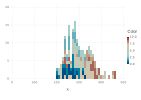

In [70]:
plot(x=sleep[:Reaction],Geom.histogram(bincount=30),color=sleep[:Days])

We can now realize that it is easier to understand the data through visualizations. Visualization is an important part of data exploration. To be actually able to visualize data, the necessary data munging and some understanding of variables are required. In this particular visualization, we can observe which areas are denser and the reaction times.

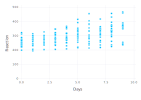

In [71]:
plot(sleep,x="Days", y="Reaction",Geom.point)

We can very well observe that the reaction times of the subjects are increasing day by day. We were able to get to this conclusion very quickly; otherwise, it would have taken some significant amount of time.


Let's drill down more into this dataset. Suppose we want to know how each individual subject has performed. As all the subjects are not the same, some might have performed quite differently from others.

On a large dataset, we can do a grouping or clustering; but here, as have a small dataset, we can individually analyze subjects.

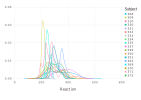

In [72]:
plot(sleep, x="Reaction",Geom.density,color="Subject")

It is evident that subject 309, even after being deprived of sleep for many days, had a very low reaction time. These are small insights that we sometimes miss through analyzing a dataset that is exposed through visualizations.

It is easy to create basic plots in Julia, for example:

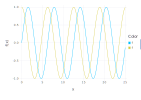

In [73]:
plot([sin,cos],0,25)

Let's now try some visualizations on the iris dataset:

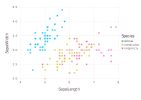

In [74]:
plot(iris_dataframe, x=:SepalLength, y=:SepalWidth, color=:Species)

Although it is not completely visible now, we can see there are visible clusters. Maybe, we can differentiate between various species using these clusters. Therefore, visualizations can be very helpful in finding these kinds of insights.


# Correlation analysis

Julia provides some functions to facilitate correlation analysis. Correlation and dependence are two common terms in statistics. Dependence refers to one variable having a statistical relationship with another variable, whereas correlation is one variable having a much wider class of relationship with the other variable, which may also include dependence.

In [75]:
a=rand(6)
b=rand(6)

6-element Array{Float64,1}:
 0.6282119430424395
 0.2409234275616623
 0.8869876963823504
 0.2663561941413266
 0.8571096915197711
 0.11470148011444792

The autocov(x) function is used to compute auto-covariance of x. It returns a vector of the same size as x.

In [76]:
autocov(a)

6-element Array{Float64,1}:
  0.04824905042483029
 -0.028705896650915472
  0.013247394574604663
 -0.02066924145770521
  0.015495332502877386
 -0.0034921141812765118

To compute auto-correlation, we use the autocor function:

In [77]:
autocor(a)

6-element Array{Float64,1}:
  1.0
 -0.5949525720850795
  0.2745628039922458
 -0.4283864920804379
  0.3211531080185375
 -0.07237684784526606

In [78]:
crosscor(a,b)

11-element Array{Float64,1}:
 -0.029529201416682672
  0.13911917550945418
 -0.27425003189981545
  0.37212628921541646
 -0.48253721789769133
  0.7606209370763283
 -0.8788950501855446
  0.594907702164253
 -0.5589108778328689
  0.5731331371920092
 -0.21578486192485855

Cross-covariance and cross-correlation of 2 arrays of length=6 results in arrays of lengths=11.


In [79]:
using Gadfly, RDatasets
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


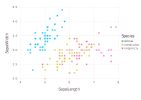

In [80]:
plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species)